In [52]:
# Count words from twitter data
# SOURCE: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/
import pandas as pd 
import numpy as np
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
#read the CSV file
data_file = pd.read_csv('covidvaccinetweets.csv')
data_file.head(10)

C:\Users\AFanch\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (5,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INDEX,USER_NAME,USER_LOCATION,USER_DESCRIPTION,USER_FOLLOWERS,USER_FRIENDS,USER_FAVOURITES,USER_VERIFIED,DATE,TEXT,...,SOURCE,IS_RETWEET,COUNTRY,SUBJECTIVITY,POLARITY,SCORE,VACCINE_BRAND,TEXT_CLEANED,MENTIONED_BRAND,YYYY-MM
0,1,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,64,11,110.0,FALSE,44061,Australia to Manufacture Covid-19 Vaccine and ...,...,Twitter Web App,False,Antarctica,0.800000,0.400000,Positive,Not Mentioned,Australia Manufacture Covid19 Vaccine give i...,Not Mentioned,2020-08
1,2,Shubham Gupta,NaN,I will tell about all experiences of my life f...,1,17,0.0,FALSE,44061,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,...,Twitter for Android,False,Antarctica,0.780000,0.910000,Positive,Not Mentioned,CoronavirusVaccine CoronaVaccine CovidVaccine ...,CoronaVac - China,2020-08
2,3,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,143,566,8.0,FALSE,44061,Deaths due to COVID-19 in Affected Countries\n...,...,Twitter Web App,False,Antarctica,0.437500,0.187500,Positive,Not Mentioned,Deaths due COVID19 in Affected Countries\nRea...,Not Mentioned,2020-08
3,4,Zane,NaN,Fresher than you.,29,25,620.0,FALSE,44061,@Team_Subhashree @subhashreesotwe @iamrajchoco...,...,Twitter for Android,False,Antarctica,0.500000,0.500000,Positive,Not Mentioned,Stay safe di amp da,Not Mentioned,2020-08
4,5,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,83,497,10737.0,FALSE,44061,@michellegrattan @ConversationEDU This is what...,...,Twitter Web App,False,Australia,0.000000,0.000000,Neutral,Not Mentioned,This is what passes for leadership in our co...,Not Mentioned,2020-08
5,6,Raunak Scherbatsky DankWorth,NaN,Neuro surgeon + Diagnostician.👨‍⚕️\na good phy...,3,27,918.0,FALSE,44061,The Multi-system Inflammatory Syndrome-Childre...,...,Twitter for Android,False,Antarctica,0.200000,0.000000,Neutral,Not Mentioned,The Multisystem Inflammary SyndromeChildren MI...,Not Mentioned,2020-08
6,7,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,918,2561,31837.0,FALSE,44061,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,...,Twitter for Android,False,India,0.000000,0.000000,Neutral,Not Mentioned,,Not Mentioned,2020-08
7,8,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",2321,3236,264351.0,FALSE,44061,"@MSNBC Well, let’s qualify that: would anyone ...",...,Twitter for iPhone,False,United States,0.600000,-0.100000,Negative,Not Mentioned,Well lets qualify that would anyone of any pa...,Not Mentioned,2020-08
8,9,Dr. Joseph Santoro,"Washington, DC 20009","Neuro PhD, #Innovator, #Technologist, #Startup...",19091,20986,128119.0,FALSE,44061,"Most countries, without the ability to make #V...",...,Hootsuite Inc.,False,United States,0.233333,0.066667,Positive,Not Mentioned,Most countries without ability make Vaccines...,Not Mentioned,2020-08
9,10,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",282,96,788.0,FALSE,44061,#DNA zooms up charts in 1st week; hear #vacci...,...,Twitter Web App,False,United States,0.000000,0.000000,Neutral,Not Mentioned,DNA zooms up charts in 1st week hear vaccines...,Not Mentioned,2020-08


In [53]:
# keep only tweets for specific date (Sep 26, 2020: highest positivity @ 60%)
dec_thirty_tweets = data_file.loc[data_file["DATE"] == 44100]
dec_thirty_tweets

,INDEX,USER_NAME,USER_LOCATION,USER_DESCRIPTION,USER_FOLLOWERS,USER_FRIENDS,USER_FAVOURITES,USER_VERIFIED,DATE,TEXT,...,SOURCE,IS_RETWEET,COUNTRY,SUBJECTIVITY,POLARITY,SCORE,VACCINE_BRAND,TEXT_CLEANED,MENTIONED_BRAND,YYYY-MM
8582,8583,EdmondDantes,NaN,Learning does not make one learned: there are ...,332,719,932.0,FALSE,44100,@marceelias @dscc @dccc @BillGates one of the ...,...,Twitter for Android,False,Antarctica,0.000000,0.000000,Neutral,Not Mentioned,one of RICHEST men in world OWNS Microso...,Not Mentioned,2020-09
8583,8584,Awanish sharma,"Mumbai, India",Filmmaker | Dreamer... Achiever\n ...,239,90,1748.0,FALSE,44100,"M not sure, but I think if India will succeed ...",...,Twitter for Android,False,India,0.449074,-0.041667,Negative,Not Mentioned,M not sure but I think if India will succeed i...,Not Mentioned,2020-09
8584,8585,"Dr. James Q. Simmons, NP","Los Angeles, CA",On-air Medical Expert•Black🖤Queer🏳️‍🌈Proud✊🏾Ho...,22212,21626,4560.0,FALSE,44100,Thanks @q_agenda for the amazing convo on LGBT...,...,Twitter for iPhone,False,United States,0.533333,0.433333,Positive,Not Mentioned,Thanks for amazing convo on LGBTQ health Cov...,Not Mentioned,2020-09
8585,8586,🌊 NastyNancyGoodTrouble🌊,"San Francisco, CA",Humanitarian Activist 4 #SyrianRefugees #Displ...,3879,4840,138228.0,FALSE,44100,It’s clear that #DennisQuaid has a lot of resp...,...,Twitter for iPhone,False,United States,0.566667,0.450000,Positive,Not Mentioned,Its clear that DennisQuaid has a lot of respec...,Not Mentioned,2020-09
8586,8587,Jack Clayton,"North Carolina, USA",NaN,3950,1566,0.0,FALSE,44100,"Report: UK Chief Scientific Adviser Owns £600,...",...,Buffer,False,United States,0.100000,0.300000,Positive,Not Mentioned,Report UK Chief Scientific Adviser Owns 600000...,Not Mentioned,2020-09
8587,8588,Thecreator,Worlwide,"A Person Who Tries To Be Liberalist, Cosmopoli...",797,398,75.0,FALSE,44100,#cnn #bbc #usa #trump #china #COVIDIOTS #COVID...,...,Twitter Web App,False,Antarctica,0.000000,0.000000,Neutral,Not Mentioned,cnn bbc usa trump china COVIDIOTS COVIDー19 Cov...,Not Mentioned,2020-09
8588,8589,rosannemiller,USA,“When all of us band together against injustic...,2770,3636,38919.0,FALSE,44100,Footage from the London Trafalgar Square demo ...,...,Twitter Web App,False,United States,0.780000,0.910000,Positive,Not Mentioned,Footage from London Trafalgar Square demo day...,Not Mentioned,2020-09
8589,8590,Dr. Partha,Rkl - Bhubaneshwar - Dubai,Global Healthcare Executive | Bentley Alumnus ...,103,126,1337.0,FALSE,44100,@nbalajiv Yes! But how you decide who are thos...,...,Twitter for iPhone,False,Antarctica,0.000000,0.000000,Neutral,Not Mentioned,Yes But how you decide who are those 20 Think...,Not Mentioned,2020-09
8590,8591,PAWAN V KULKARNI,"Mumbai, India","Speaker, Hobby photographer, Blunt, Foolish, S...",942,2042,1393.0,FALSE,44100,"#CarrotOfTrials\nWith no #vaccine in picture, ...",...,Twitter for Android,False,India,0.200000,0.200000,Positive,Not Mentioned,CarrotOfTrials\nWith no vaccine in picture it ...,Not Mentioned,2020-09
8591,8592,Jacqueline Zeisler Heslin,"Baltimore, MD","OPAT Nurse Coordinator, Department of Infectio...",7,41,393.0,FALSE,44100,@JoeBiden We need collaboration to replace com...,...,Twitter for iPhone,False,United States,0.625000,0.250000,Positive,Not Mentioned,We need collaboration replace competition Am...,Not Mentioned,2020-09


In [54]:
# store cleaned tweets in a list
tweets_cleaned = dec_thirty_tweets["TEXT_CLEANED"]
tweets_cleaned

8582        one of  RICHEST men in  world OWNS Microso...
8583    M not sure but I think if India will succeed i...
8584    Thanks  for  amazing convo on LGBTQ health Cov...
8585    Its clear that DennisQuaid has a lot of respec...
8586    Report UK Chief Scientific Adviser Owns 600000...
8587    cnn bbc usa trump china COVIDIOTS COVIDー19 Cov...
8588    Footage from  London Trafalgar Square demo day...
8589     Yes But how you decide who are those 20 Think...
8590    CarrotOfTrials\nWith no vaccine in picture it ...
8591     We need collaboration  replace competition Am...
Name: TEXT_CLEANED, dtype: object

In [55]:
# Split and lower-case words in all tweets by comibining .lower() and .split()  methods in a list comprehension
words_in_tweet = [tweet.lower().split() for tweet in tweets_cleaned]
words_in_tweet[:2]

[['one',
  'of',
  'richest',
  'men',
  'in',
  'world',
  'owns',
  'microsoft',
  '1',
  'software',
  'company',
  'in'],
 ['m',
  'not',
  'sure',
  'but',
  'i',
  'think',
  'if',
  'india',
  'will',
  'succeed',
  'in',
  'making',
  'vaccine',
  'first',
  'will',
  'start',
  'sell',
  'it',
  'in',
  'foreign',
  'countri']]

In [56]:
# List of all words across tweets
all_words_no_urls = list(itertools.chain(*words_in_tweet))

In [57]:
# Create counter
counts_no_urls = collections.Counter(all_words_no_urls)

In [58]:
counts_no_urls.most_common(15)

[('in', 6),
 ('of', 3),
 ('not', 3),
 ('vaccine', 3),
 ('world', 2),
 ('owns', 2),
 ('but', 2),
 ('i', 2),
 ('think', 2),
 ('will', 2),
 ('it', 2),
 ('for', 2),
 ('on', 2),
 ('covid', 2),
 ('covidvaccine', 2)]

In [59]:
# Create a Dataframe for analysis and plotting that includes only the top 15 most common words.
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),
                             columns=['words', 'count'])

clean_tweets_no_urls.head()

,words,count
0,in,6
1,of,3
2,not,3
3,vaccine,3
4,world,2


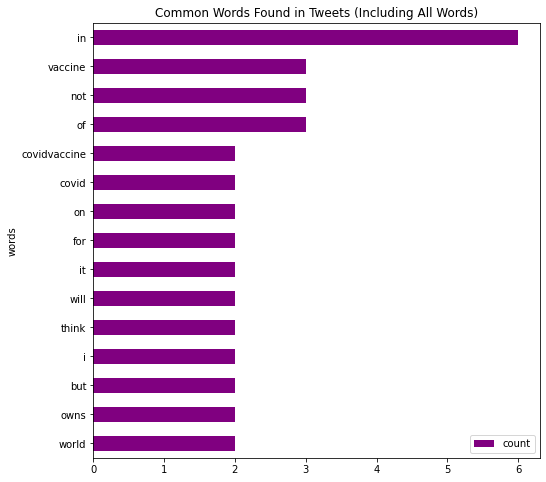

In [60]:
# Create a horizontal bar graph of the top 15 most common words in the tweets 
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [61]:
stop_words = set(stopwords.words('english'))

In [62]:
# View a few words from the set
list(stop_words)[0:10]

['should',
 'how',
 'me',
 "wasn't",
 'those',
 'such',
 'hers',
 'weren',
 'these',
 'her']

In [63]:
# Remove all of the stop words in each tweet
for all_words in words_in_tweet:
    for word in all_words:
        # Remove stop words from each tweet list of words
        tweets_nsw = [[word for word in tweet_words if not word in stop_words]
                      for tweet_words in words_in_tweet]

tweets_nsw[0]

['one',
 'richest',
 'men',
 'world',
 'owns',
 'microsoft',
 '1',
 'software',
 'company']

In [64]:
# Flatten list & create counter to return the most commonly used words and their frequencies. 
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('vaccine', 3),
 ('world', 2),
 ('owns', 2),
 ('think', 2),
 ('covid', 2),
 ('covidvaccine', 2),
 ('lot', 2),
 ('uk', 2),
 ('usa', 2),
 ('focused', 2),
 ('one', 1),
 ('richest', 1),
 ('men', 1),
 ('microsoft', 1),
 ('1', 1)]

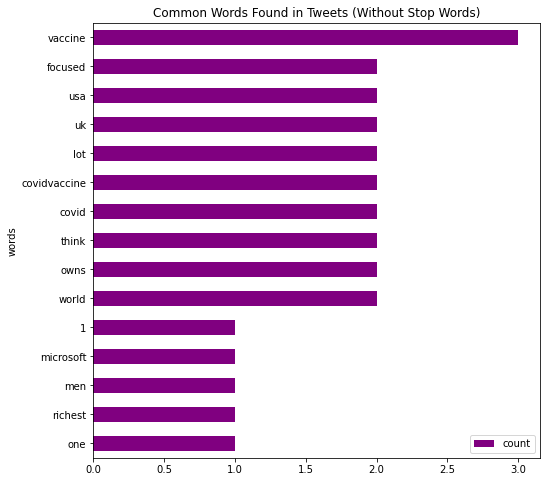

In [65]:
# Create Dataframe & plot the word frequencies without the stop words.
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()
